In [2]:
import pandas as pd

In [3]:
beansData = pd.read_csv("beansData//Beans_Price_Report.csv")
beansData.head()

,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate
0,0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2800,2400,15-Feb-20
1,1,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600,2000,1800,14-Feb-20
2,2,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1800,2200,2000,13-Feb-20
3,3,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2400,2200,12-Feb-20
4,4,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2400,2200,11-Feb-20


In [4]:
print("From: ",pd.to_datetime(beansData["PriceDate"]).min().date())
print("To: ",pd.to_datetime(beansData["PriceDate"]).max().date())

From:  2018-01-01
To:  2020-02-15


In [5]:
beansData["weekday"] = beansData["PriceDate"].apply(lambda x: pd.to_datetime(x).date().weekday(), 1)
beansData.head()

,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2800,2400,15-Feb-20,5
1,1,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600,2000,1800,14-Feb-20,4
2,2,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1800,2200,2000,13-Feb-20,3
3,3,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2400,2200,12-Feb-20,2
4,4,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2000,2400,2200,11-Feb-20,1


In [6]:
beansData.groupby(["weekday","Market"])["PriceDate"].count()

weekday  Market                     
0        Binny Mill (F&V), Bangalore     89
         Ramanagara                     106
1        Binny Mill (F&V), Bangalore     87
         Ramanagara                     106
2        Binny Mill (F&V), Bangalore     84
         Ramanagara                     106
3        Binny Mill (F&V), Bangalore     87
         Ramanagara                     106
4        Binny Mill (F&V), Bangalore     88
         Ramanagara                     107
5        Binny Mill (F&V), Bangalore     59
         Ramanagara                     104
6        Ramanagara                       2
Name: PriceDate, dtype: int64

In [7]:
from calendar import month_abbr
from math import isnan
import numpy as np
import matplotlib.pyplot as plt
import datetime


def rowFiller(x):
    indices = [x-7, x-14, x-21]
    MinPrice= sum([finalFrame.loc[i,"MinPrice"] for i in indices if i>=0])/3
    MaxPrice= sum([finalFrame.loc[i,"MaxPrice"] for i in indices if i>=0])/3
    ModalPrice= sum([finalFrame.loc[i,"ModalPrice"] for i in indices if i>=0])/3
    print(MinPrice, MaxPrice, ModalPrice)
    temp = finalFrame.loc[x-7]
    temp["PriceDate"]= dateFormatChange((pd.to_datetime(temp["PriceDate"])+datetime.timedelta(days=7)))
    temp["date"]= temp["PriceDate"]
    temp["MinPrice"]= MinPrice
    temp["MaxPrice"]= MaxPrice
    temp["ModalPrice"]= ModalPrice
    return temp


def dateFormatChange(x):
    x = str(x.date()).split("-")[::-1]
    x[1] = month_abbr[int(x[1])]
    x[2] = x[2][2:]
    return "-".join(x)



## Ramanagara

In [8]:
datelist = pd.date_range(pd.to_datetime(beansData["PriceDate"]).min().date(),end = pd.to_datetime(beansData["PriceDate"]).max().date()).to_pydatetime().tolist()
finalFrame = pd.DataFrame({"date": datelist})
print(finalFrame.head())
finalFrame["date"] = finalFrame.date.apply(dateFormatChange, 1)
finalFrame.head()

        date
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05


,date
0,01-Jan-18
1,02-Jan-18
2,03-Jan-18
3,04-Jan-18
4,05-Jan-18


In [9]:
finalFrame = pd.merge(finalFrame, beansData[beansData.Market=='Ramanagara'], left_on='date', right_on='PriceDate', how='left')
finalFrame

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,636.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,01-Jan-18,0.0
1,02-Jan-18,635.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,02-Jan-18,1.0
2,03-Jan-18,634.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,03-Jan-18,2.0
3,04-Jan-18,633.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,04-Jan-18,3.0
4,05-Jan-18,632.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,05-Jan-18,4.0
5,06-Jan-18,631.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08-Jan-18,630.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1000.0,1600.0,1300.0,08-Jan-18,0.0
8,09-Jan-18,629.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,09-Jan-18,1.0
9,10-Jan-18,628.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,2000.0,1600.0,10-Jan-18,2.0


In [10]:
for i,j in finalFrame.iterrows():
    if(isnan(j.weekday)):
        finalFrame.loc[i,"weekday"] = (finalFrame.loc[i-1,"weekday"]+1)%7
finalFrame

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,636.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,01-Jan-18,0.0
1,02-Jan-18,635.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,02-Jan-18,1.0
2,03-Jan-18,634.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,03-Jan-18,2.0
3,04-Jan-18,633.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,04-Jan-18,3.0
4,05-Jan-18,632.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,05-Jan-18,4.0
5,06-Jan-18,631.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,08-Jan-18,630.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1000.0,1600.0,1300.0,08-Jan-18,0.0
8,09-Jan-18,629.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,09-Jan-18,1.0
9,10-Jan-18,628.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.0,2000.0,1600.0,10-Jan-18,2.0


In [11]:
print(finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].head())
nanIndices = finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].index
print("Null rows: ",nanIndices,"\nNumber of null rows: ",len(nanIndices))

          date  Sl. No. District Market Commodity Variety Grade  MinPrice  \
109  20-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
110  21-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
112  23-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
113  24-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
114  25-Apr-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   

     MaxPrice  ModalPrice PriceDate  weekday  
109       NaN         NaN       NaN      4.0  
110       NaN         NaN       NaN      5.0  
112       NaN         NaN       NaN      0.0  
113       NaN         NaN       NaN      1.0  
114       NaN         NaN       NaN      2.0  
Null rows:  Int64Index([109, 110, 112, 113, 114, 131, 290, 358, 472, 542, 543, 544, 546,
            547, 548, 549, 550, 551, 553, 554, 555, 556, 557, 558, 609, 644,
            645, 723, 740, 744, 754],
           dtype='int64') 
Number of null rows:  31

### Some Plots exploring the Data

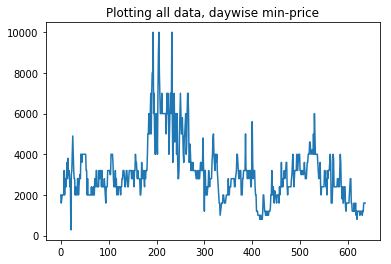

In [12]:
plt.title("Plotting all data, daywise min-price")
plt.plot(beansData[beansData.Market == "Ramanagara"].MinPrice)
plt.show()

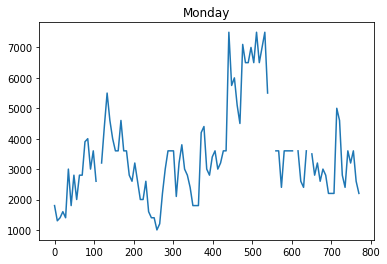

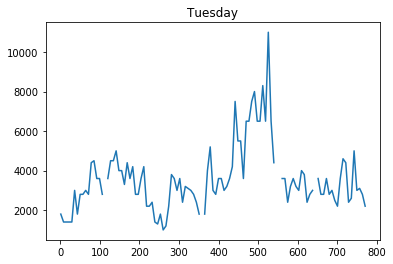

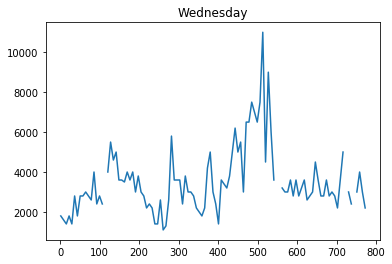

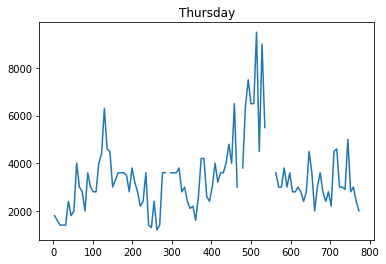

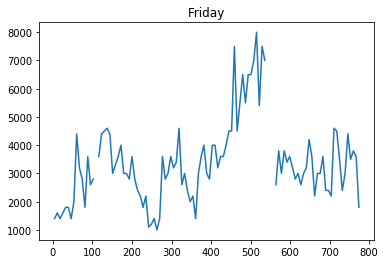

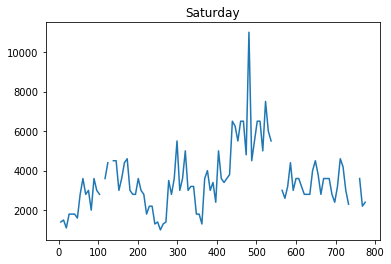

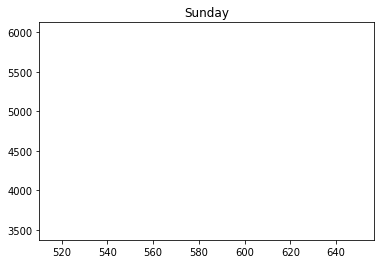

In [13]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for i in range(7):
    plt.title(days[i])
    plt.plot(finalFrame[finalFrame.weekday == float(i)].ModalPrice)
    plt.show()

### Interpolation on null rows

In [14]:
print(rowFiller(101))

2533.3333333333335 3200.0 2866.6666666666665
date              12-Apr-18
Sl. No.                 555
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2533.33
MaxPrice               3200
ModalPrice          2866.67
PriceDate         12-Apr-18
weekday                   3
Name: 94, dtype: object


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame


In [15]:
for i in nanIndices:
    print(finalFrame.loc[i])
    finalFrame.loc[i] = rowFiller(i)
    print(finalFrame.loc[i],"\n\n")

date          20-Apr-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               4
Name: 109, dtype: object
2666.6666666666665 3333.3333333333335 3000.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame


date              20-Apr-18
Sl. No.                 548
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2666.67
MaxPrice            3333.33
ModalPrice             3000
PriceDate         20-Apr-18
weekday                   4
Name: 109, dtype: object 


date          21-Apr-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 110, dtype: object
2800.0 3466.6666666666665 3133.3333333333335
date              21-Apr-18
Sl. No.                 547
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2800
MaxPrice            3466.67
ModalPrice          3133.3

date              01-Jul-19
Sl. No.                 182
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               6000
MaxPrice            7333.33
ModalPrice          6666.67
PriceDate         01-Jul-19
weekday                   0
Name: 546, dtype: object 


date          02-Jul-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               1
Name: 547, dtype: object
6666.666666666667 7933.333333333333 7300.0
date              02-Jul-19
Sl. No.                 181
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            6666.67
MaxPrice            7933.33
ModalPrice             7300


date              02-Sep-19
Sl. No.                 143
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               3200
MaxPrice               4000
ModalPrice             3600
PriceDate         02-Sep-19
weekday                   0
Name: 609, dtype: object 


date          07-Oct-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               0
Name: 644, dtype: object
2533.3333333333335 3200.0 2866.6666666666665
date              07-Oct-19
Sl. No.                 114
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2533.33
MaxPrice               3200
ModalPrice          2866.6

In [16]:
finalFrame

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,636.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.000000,2000.000000,1800.000000,01-Jan-18,0.0
1,02-Jan-18,635.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.000000,2000.000000,1800.000000,02-Jan-18,1.0
2,03-Jan-18,634.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.000000,2000.000000,1800.000000,03-Jan-18,2.0
3,04-Jan-18,633.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1600.000000,2000.000000,1800.000000,04-Jan-18,3.0
4,05-Jan-18,632.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.000000,1600.000000,1400.000000,05-Jan-18,4.0
5,06-Jan-18,631.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.000000,1600.000000,1400.000000,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,08-Jan-18,630.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1000.000000,1600.000000,1300.000000,08-Jan-18,0.0
8,09-Jan-18,629.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.000000,1600.000000,1400.000000,09-Jan-18,1.0
9,10-Jan-18,628.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,1200.000000,2000.000000,1600.000000,10-Jan-18,2.0


In [17]:
finalFrame.loc[[108,109,110,111,112]]   #all data filled except for the Sundays

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
108,19-Apr-18,543.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2400.000000,3200.000000,2800.000000,19-Apr-18,3.0
109,20-Apr-18,548.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2666.666667,3333.333333,3000.000000,20-Apr-18,4.0
110,21-Apr-18,547.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2800.000000,3466.666667,3133.333333,21-Apr-18,5.0
111,22-Apr-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
112,23-Apr-18,546.0,Bangalore,Ramanagara,Beans,Beans (Whole),FAQ,2800.000000,3333.333333,3066.666667,23-Apr-18,0.0


In [18]:
print(finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].head())
nanIndices = finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].index
print("Null rows: ",nanIndices,"\nNumber of null rows: ",len(nanIndices))

Empty DataFrame
Columns: [date, Sl. No., District, Market, Commodity, Variety, Grade, MinPrice, MaxPrice, ModalPrice, PriceDate, weekday]
Index: []
Null rows:  Int64Index([], dtype='int64') 
Number of null rows:  0


### Replotting the weekdays-wise plots

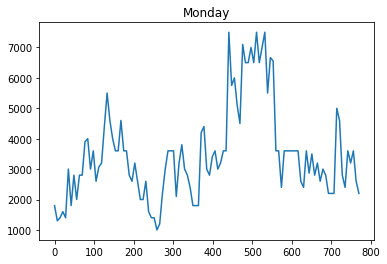

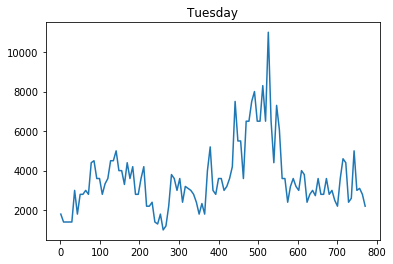

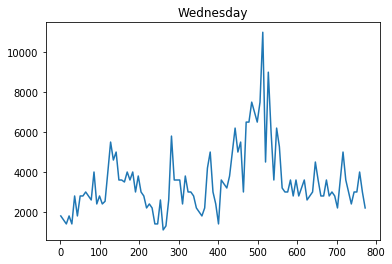

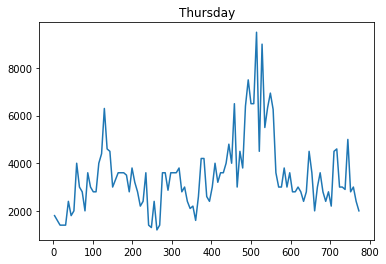

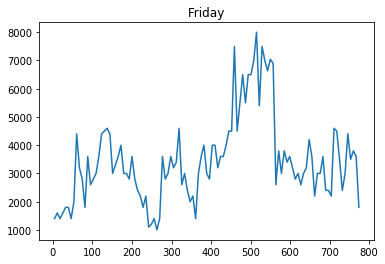

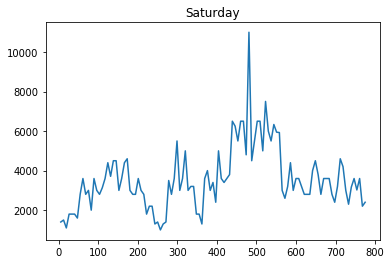

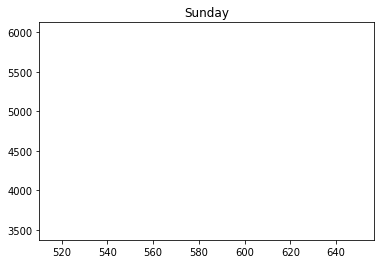

In [19]:
for i in range(7):
    plt.title(days[i])
    plt.plot(finalFrame[finalFrame.weekday == float(i)].ModalPrice)
    plt.show()

## For Binny Mill (F&V), Bangalore

In [20]:
datelist = pd.date_range(pd.to_datetime(beansData["PriceDate"]).min().date(),end = pd.to_datetime(beansData["PriceDate"]).max().date()).to_pydatetime().tolist()
finalFrameBinny = pd.DataFrame({"date": datelist})
print(finalFrameBinny.head())
finalFrameBinny["date"] = finalFrameBinny.date.apply(dateFormatChange, 1)
finalFrameBinny.head()

        date
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05


,date
0,01-Jan-18
1,02-Jan-18
2,03-Jan-18
3,04-Jan-18
4,05-Jan-18


In [21]:
finalFrameBinny = pd.merge(finalFrameBinny, beansData[beansData.Market=='Binny Mill (F&V), Bangalore'], left_on='date', right_on='PriceDate', how='left')
finalFrameBinny

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,493.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1800.0,2500.0,2200.0,01-Jan-18,0.0
1,02-Jan-18,492.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1800.0,2500.0,2000.0,02-Jan-18,1.0
2,03-Jan-18,491.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,03-Jan-18,2.0
3,04-Jan-18,490.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1400.0,1800.0,1600.0,04-Jan-18,3.0
4,05-Jan-18,489.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,05-Jan-18,4.0
5,06-Jan-18,488.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1500.0,1300.0,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08-Jan-18,487.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1800.0,1500.0,08-Jan-18,0.0
8,09-Jan-18,486.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1300.0,2000.0,1600.0,09-Jan-18,1.0
9,10-Jan-18,485.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1500.0,1300.0,10-Jan-18,2.0


In [22]:
for i,j in finalFrameBinny.iterrows():
    if(isnan(j.weekday)):
        finalFrameBinny.loc[i,"weekday"] = (finalFrameBinny.loc[i-1,"weekday"]+1)%7
finalFrameBinny

,date,Sl. No.,District,Market,Commodity,Variety,Grade,MinPrice,MaxPrice,ModalPrice,PriceDate,weekday
0,01-Jan-18,493.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1800.0,2500.0,2200.0,01-Jan-18,0.0
1,02-Jan-18,492.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1800.0,2500.0,2000.0,02-Jan-18,1.0
2,03-Jan-18,491.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1600.0,2000.0,1800.0,03-Jan-18,2.0
3,04-Jan-18,490.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1400.0,1800.0,1600.0,04-Jan-18,3.0
4,05-Jan-18,489.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1200.0,1600.0,1400.0,05-Jan-18,4.0
5,06-Jan-18,488.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1500.0,1300.0,06-Jan-18,5.0
6,07-Jan-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,08-Jan-18,487.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1800.0,1500.0,08-Jan-18,0.0
8,09-Jan-18,486.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1300.0,2000.0,1600.0,09-Jan-18,1.0
9,10-Jan-18,485.0,Bangalore,"Binny Mill (F&V), Bangalore",Beans,Beans (Whole),FAQ,1000.0,1500.0,1300.0,10-Jan-18,2.0


In [23]:
print(finalFrameBinny[(np.isnan(finalFrameBinny.ModalPrice)) & (finalFrameBinny.weekday != 6.0) ].head())
nanIndicesBinny = finalFrameBinny[(np.isnan(finalFrameBinny.ModalPrice)) & (finalFrameBinny.weekday != 6.0) ].index
print("Null rows: ",nanIndicesBinny,"\nNumber of null rows: ",len(nanIndicesBinny))

         date  Sl. No. District Market Commodity Variety Grade  MinPrice  \
12  13-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
14  15-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
19  20-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
24  25-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   
25  26-Jan-18      NaN      NaN    NaN       NaN     NaN   NaN       NaN   

    MaxPrice  ModalPrice PriceDate  weekday  
12       NaN         NaN       NaN      5.0  
14       NaN         NaN       NaN      0.0  
19       NaN         NaN       NaN      5.0  
24       NaN         NaN       NaN      3.0  
25       NaN         NaN       NaN      4.0  
Null rows:  Int64Index([ 12,  14,  19,  24,  25,  26,  40,  43,  59,  66,
            ...
            677, 683, 691, 712, 723, 726, 740, 744, 754, 768],
           dtype='int64', length=172) 
Number of null rows:  172


### Some Plots exploring the Data

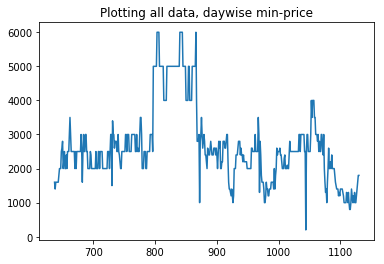

In [24]:
plt.title("Plotting all data, daywise min-price")
plt.plot(beansData[beansData.Market == 'Binny Mill (F&V), Bangalore'].MinPrice)
plt.show()

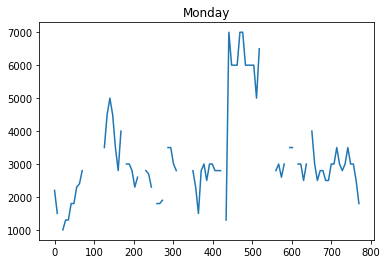

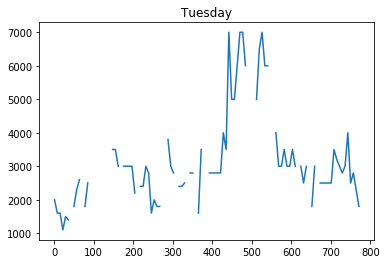

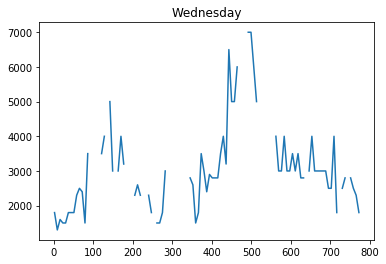

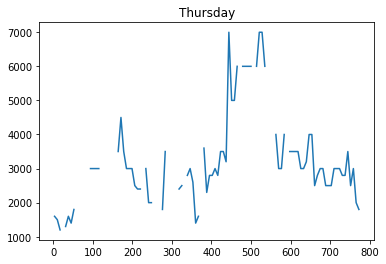

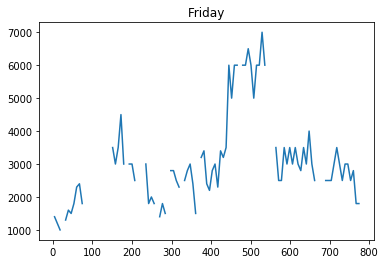

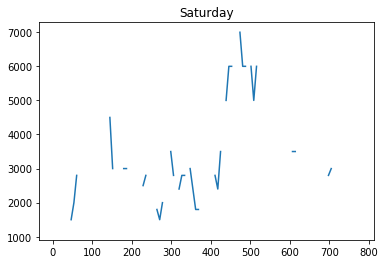

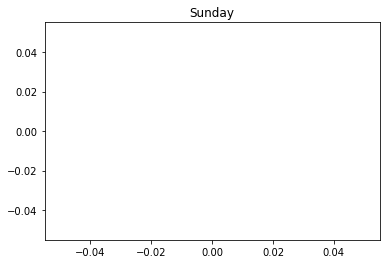

In [25]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for i in range(7):
    plt.title(days[i])
    plt.plot(finalFrameBinny[finalFrameBinny.weekday == float(i)].ModalPrice)
    plt.show()

### Interpolation on null rows

In [26]:
print(rowFiller(101))

2533.3333333333335 3200.0 2866.6666666666665
date              12-Apr-18
Sl. No.                 555
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2533.33
MaxPrice               3200
ModalPrice          2866.67
PriceDate         12-Apr-18
weekday                   3
Name: 94, dtype: object


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame


In [27]:
for i in nanIndicesBinny:
    print(finalFrameBinny.loc[i])
    finalFrameBinny.loc[i] = rowFiller(i)
    print(finalFrameBinny.loc[i],"\n\n")

date          13-Jan-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 12, dtype: object
400.0 533.3333333333334 466.6666666666667
date              13-Jan-18
Sl. No.                 631
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice                400
MaxPrice            533.333
ModalPrice          466.667
PriceDate         13-Jan-18
weekday                   5
Name: 12, dtype: object 


date          15-Jan-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday            

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame


date              15-Jan-18
Sl. No.                 630
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            866.667
MaxPrice               1200
ModalPrice          1033.33
PriceDate         15-Jan-18
weekday                   0
Name: 14, dtype: object 


date          20-Jan-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 19, dtype: object
733.3333333333334 1200.0 966.6666666666666
date              20-Jan-18
Sl. No.                 625
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            733.333
MaxPrice               1200
ModalPrice          966.667
Pr

date              22-Mar-18
Sl. No.                 573
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2933.33
MaxPrice               3600
ModalPrice          3266.67
PriceDate         22-Mar-18
weekday                   3
Name: 80, dtype: object 


date          23-Mar-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               4
Name: 81, dtype: object
3066.6666666666665 3866.6666666666665 3466.6666666666665
date              23-Mar-18
Sl. No.                 572
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            3066.67
MaxPrice            3866.67
ModalPrice      

date              16-Apr-18
Sl. No.                 552
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               3200
MaxPrice            3866.67
ModalPrice          3533.33
PriceDate         16-Apr-18
weekday                   0
Name: 105, dtype: object 


date          17-Apr-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               1
Name: 106, dtype: object
3466.6666666666665 4333.333333333333 3900.0
date              17-Apr-18
Sl. No.                 551
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            3466.67
MaxPrice            4333.33
ModalPrice             3900

date              03-May-18
Sl. No.                 542
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2800
MaxPrice               3600
ModalPrice             3200
PriceDate         03-May-18
weekday                   3
Name: 122, dtype: object 


date          04-May-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               4
Name: 123, dtype: object
2755.555555555555 3511.1111111111113 3133.3333333333335
date              04-May-18
Sl. No.                 541
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2755.56
MaxPrice            3511.11
ModalPrice     

date              07-Jun-18
Sl. No.                 513
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            3666.67
MaxPrice               4400
ModalPrice          4033.33
PriceDate         07-Jun-18
weekday                   3
Name: 157, dtype: object 


date          09-Jun-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 159, dtype: object
3600.0 4400.0 4000.0
date              09-Jun-18
Sl. No.                 511
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               3600
MaxPrice               4400
ModalPrice             4000
PriceDate         09-J

date              04-Aug-18
Sl. No.                 463
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2800
MaxPrice            3466.67
ModalPrice          3133.33
PriceDate         04-Aug-18
weekday                   5
Name: 215, dtype: object 


date          06-Aug-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               0
Name: 217, dtype: object
2400.0 3200.0 2800.0
date              06-Aug-18
Sl. No.                 462
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2400
MaxPrice               3200
ModalPrice             2800
PriceDate         06-A

date              13-Sep-18
Sl. No.                 429
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               1800
MaxPrice               2400
ModalPrice             2100
PriceDate         13-Sep-18
weekday                   3
Name: 255, dtype: object 


date          15-Sep-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 257, dtype: object
1400.0 1866.6666666666667 1633.3333333333333
date              15-Sep-18
Sl. No.                 427
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               1400
MaxPrice            1866.67
ModalPrice          1633.3

date              24-Oct-18
Sl. No.                 394
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            3733.33
MaxPrice            4266.67
ModalPrice             4000
PriceDate         24-Oct-18
weekday                   2
Name: 296, dtype: object 


date          01-Nov-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               3
Name: 304, dtype: object
2977.777777777778 3733.3333333333335 3355.555555555555
date              01-Nov-18
Sl. No.                 388
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2977.78
MaxPrice            3733.33
ModalPrice      

date              05-Dec-18
Sl. No.                 359
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            2933.33
MaxPrice            3466.67
ModalPrice          3266.67
PriceDate         05-Dec-18
weekday                   2
Name: 338, dtype: object 


date          08-Dec-18
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 341, dtype: object
3200.0 4266.666666666667 3733.3333333333335
date              08-Dec-18
Sl. No.                 356
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               3200
MaxPrice            4266.67
ModalPrice          3733.33

date              06-Apr-19
Sl. No.                 255
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            5666.67
MaxPrice               6500
ModalPrice          6083.33
PriceDate         06-Apr-19
weekday                   5
Name: 460, dtype: object 


date          13-Apr-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 467, dtype: object
5666.666666666667 6500.0 6083.333333333333
date              13-Apr-19
Sl. No.                 249
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            5666.67
MaxPrice               6500
ModalPrice          6083.33


date              10-Jun-19
Sl. No.                 200
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            6333.33
MaxPrice            7333.33
ModalPrice          6833.33
PriceDate         10-Jun-19
weekday                   0
Name: 525, dtype: object 


date          12-Jun-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               2
Name: 527, dtype: object
7000.0 8333.333333333334 7666.666666666667
date              12-Jun-19
Sl. No.                 198
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               7000
MaxPrice            8333.33
ModalPrice          7666.67


date              05-Jul-19
Sl. No.                 184
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            6333.33
MaxPrice            7755.56
ModalPrice          7044.44
PriceDate         05-Jul-19
weekday                   4
Name: 550, dtype: object 


date          06-Jul-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 551, dtype: object
5222.222222222223 6666.666666666667 5944.444444444444
date              06-Jul-19
Sl. No.                 183
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice            5222.22
MaxPrice            6666.67
ModalPrice       

date              24-Aug-19
Sl. No.                 150
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               3200
MaxPrice            3866.67
ModalPrice          3533.33
PriceDate         24-Aug-19
weekday                   5
Name: 600, dtype: object 


date          02-Sep-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               0
Name: 609, dtype: object
3200.0 4000.0 3600.0
date              02-Sep-19
Sl. No.                 143
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               3200
MaxPrice               4000
ModalPrice             3600
PriceDate         02-S

date              15-Nov-19
Sl. No.                  81
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               2400
MaxPrice            2933.33
ModalPrice          2733.33
PriceDate         15-Nov-19
weekday                   4
Name: 683, dtype: object 


date          23-Nov-19
Sl. No.             NaN
District            NaN
Market              NaN
Commodity           NaN
Variety             NaN
Grade               NaN
MinPrice            NaN
MaxPrice            NaN
ModalPrice          NaN
PriceDate           NaN
weekday               5
Name: 691, dtype: object
3200.0 4000.0 3600.0
date              23-Nov-19
Sl. No.                  74
District          Bangalore
Market           Ramanagara
Commodity             Beans
Variety       Beans (Whole)
Grade                   FAQ
MinPrice               3200
MaxPrice               4000
ModalPrice             3600
PriceDate         23-N

In [28]:
print(finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].head())
nanIndices = finalFrame[(np.isnan(finalFrame.ModalPrice)) & (finalFrame.weekday != 6.0) ].index
print("Null rows: ",nanIndices,"\nNumber of null rows: ",len(nanIndices))

Empty DataFrame
Columns: [date, Sl. No., District, Market, Commodity, Variety, Grade, MinPrice, MaxPrice, ModalPrice, PriceDate, weekday]
Index: []
Null rows:  Int64Index([], dtype='int64') 
Number of null rows:  0


### Replotting the weekdays-wise plots

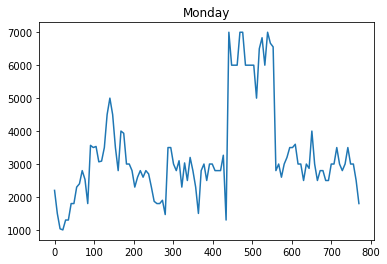

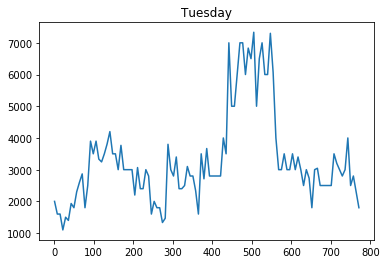

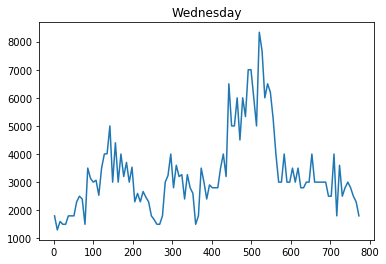

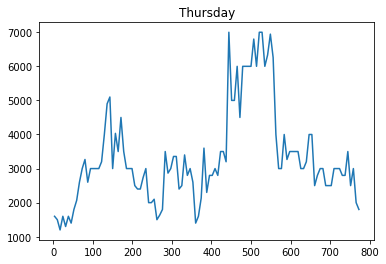

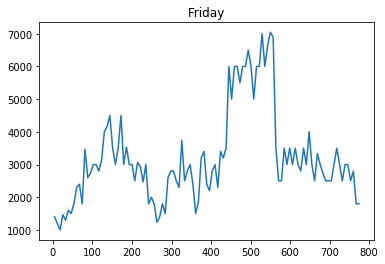

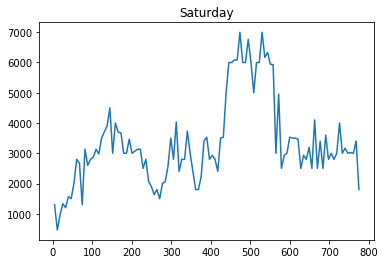

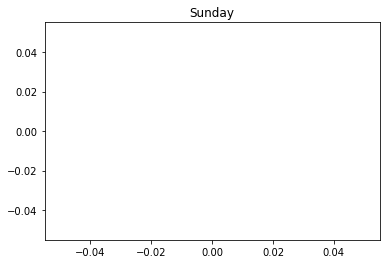

In [29]:
for i in range(7):
    plt.title(days[i])
    plt.plot(finalFrameBinny[finalFrameBinny.weekday == float(i)].ModalPrice)
    plt.show()

# Forecasting


In [67]:
# import fbprophet
from fbprophet import Prophet
# from dateutil.easter import easter


finalFrame.head(100)
finalFrameBinny.dropna(subset=["date","Sl. No.","District","Market","Commodity","Variety","Grade","MinPrice","MaxPrice","ModalPrice","PriceDate"],inplace=True)
finalFrame.dropna(subset=["date","Sl. No.","District","Market","Commodity","Variety","Grade","MinPrice","MaxPrice","ModalPrice","PriceDate"],inplace=True)



m1=Prophet()
ffcopy=finalFrame[["date","MinPrice"]].copy()
ffcopy.rename(columns={'date':'ds','MinPrice':'y'},inplace=True)
m1.fit(ffcopy)
future1=m.make_future_dataframe(periods=365)
forecast1=m1.predict(future1)
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])




ffBinnycopy=finalFrameBinny[["date","MinPrice"]].copy()
ffBinnycopy.rename(columns={'date':'ds','MinPrice':'y'},inplace=True)
m2=Prophet()
m2.fit(ffBinnycopy)
future2=m.make_future_dataframe(periods=365)
forecast2=m2.predict(future2)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])




# future.tail()

# print(finalFrame[["date","MinPrice"]])
# finalFrame.head(100)





INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds         yhat  yhat_lower   yhat_upper
0    2018-01-01  1094.621638   49.641813  2153.704195
1    2018-01-02  1196.039205  141.199134  2224.234027
2    2018-01-03  1161.539444  112.334981  2218.135405
3    2018-01-04  1156.505579  155.154407  2216.602555
4    2018-01-05  1176.351302  104.998011  2169.085698
5    2018-01-06  1257.220417  216.007371  2275.297455
6    2018-01-08  1292.493026  235.398397  2378.304518
7    2018-01-09  1389.215403  388.358810  2447.310702
8    2018-01-10  1347.900437  302.551732  2398.804556
9    2018-01-11  1333.986133  225.156180  2416.256035
10   2018-01-12  1342.983446  290.553890  2358.573513
11   2018-01-13  1411.175140  290.348321  2437.671948
12   2018-01-15  1416.357909  411.963498  2469.709152
13   2018-01-16  1496.132257  403.535702  2536.135663
14   2018-01-17  1436.960321  296.116707  2454.071629
15   2018-01-18  1404.579618  295.197234  2436.370039
16   2018-01-19  1394.816999  380.197123  2481.949557
17   2018-01-20  1444.280796

/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



             ds         yhat  yhat_lower   yhat_upper
0    2018-01-01   927.887084   74.643279  1678.788078
1    2018-01-02   952.654340  256.447270  1663.249984
2    2018-01-03   964.530923  201.789830  1717.194208
3    2018-01-04   989.524415  250.778172  1716.667759
4    2018-01-05   902.378856  125.631146  1628.153496
5    2018-01-06  1072.243524  342.093875  1855.352679
6    2018-01-08  1035.153821  289.196614  1766.172841
7    2018-01-09  1072.625883  344.916484  1805.255270
8    2018-01-10  1094.684186  357.229167  1862.881221
9    2018-01-11  1127.134964  379.414544  1883.879294
10   2018-01-12  1044.579609  284.133985  1771.645867
11   2018-01-13  1216.086225  471.678774  1920.095617
12   2018-01-15  1173.425528  440.706456  1965.681071
13   2018-01-16  1203.835830  507.353399  1935.901355
14   2018-01-17  1216.182684  462.968280  1963.104344
15   2018-01-18  1236.493400  491.757202  1971.340121
16   2018-01-19  1139.640937  416.615645  1905.003731
17   2018-01-20  1295.009489